# Visualising Information - PROJECT

## Problem Statement - Based on the data, Find visual insights from it.

**Dataset Description**:


The **basic idea** of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. 


With such an overwhelming demand of restaurants it has therefore become **important to study the demography of a location**. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.


The data is accurate to that available on the zomato website until 15 March 2019. The data was scraped from Zomato in two phase. 

After going through the structure of the website it was found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars. 

**Phase I**, In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. 

**Phase II**, In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item was extracted.

**Column Description**
1. *url* - contains the url of the restaurant in the zomato website
addresscontains the address of the restaurant in Bengaluru
namecontains the name of the restaurant


2. *online_order* - whether online ordering is available in the restaurant or not


3. *book_table* - table book option available or not


4. *rate* - contains the overall rating of the restaurant out of 5


5. *votes* - contains total number of rating for the restaurant as of the above mentioned date


6. *phone* - contains the phone number of the restaurant


7. *location* - contains the neighborhood in which the restaurant is located
rest_typerestaurant type


8. *dish_liked* - dishes people liked in the restaurant
cuisinesfood styles, separated by comma


9. *approx_cost(for two people)* - contains the approximate cost for meal for two people


10. *reviews_list* - list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer


11. *menu_item* - contains list of menus available in the restaurant
listed_in(type)type of meal


12. *listed_in(city)* - contains the neighborhood in which the restaurant is listed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

# Question 1
**Analyse the number of Restaurants based on their Online Delivery by making a count plot**

In [5]:
print("No. of restaurants with online delivery:")
(df.online_order == 'Yes').sum()

No. of restaurants with online delivery:


30444

In [6]:
print("No. of restaurants which does not deliver online:")
(df.online_order == 'No').sum()

No. of restaurants which does not deliver online:


21273

In [7]:
df.name.count()

51717

Text(0.5, 1.0, 'Restaurants delivering online or Not')

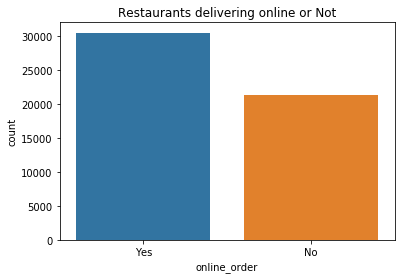

In [8]:
sns.countplot(x=df['online_order'])
plt.title('Restaurants delivering online or Not')

# Question 2
**Analyse the number of Restaurants based on their Table booking facility by  making count plot**

In [9]:
print("No. of restaurants with table booking facility:")
(df.book_table == 'Yes').sum()

No. of restaurants with table booking facility:


6449

In [10]:
print("No. of restaurants with table booking facility:")
(df.book_table == 'No').sum()

No. of restaurants with table booking facility:


45268

Text(0.5, 1.0, 'Restaurants providing Table booking facility:')

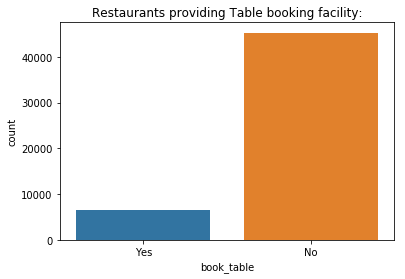

In [11]:
sns.countplot(x=df['book_table'])
plt.title('Restaurants providing Table booking facility:')

# Question 3
**Analyse the number of Restaurants based on their Ratings using Pie Chart**

In [12]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
#No. of New Restaurants on Zomato
((df.rate=='NEW')).sum()

2208

In [14]:
((df.rate>='2.5') & (df.rate<'3')).sum()

2070

In [15]:
((df.rate>='2') & (df.rate<'2.5')).sum()

182

In [16]:
((df.rate>='3.5') & (df.rate<'4')).sum()

17766

In [17]:
((df.rate>='4') & (df.rate<'4.5')).sum()

11155

In [18]:
((df.rate>='4.5') & (df.rate<'5')).sum()

1244

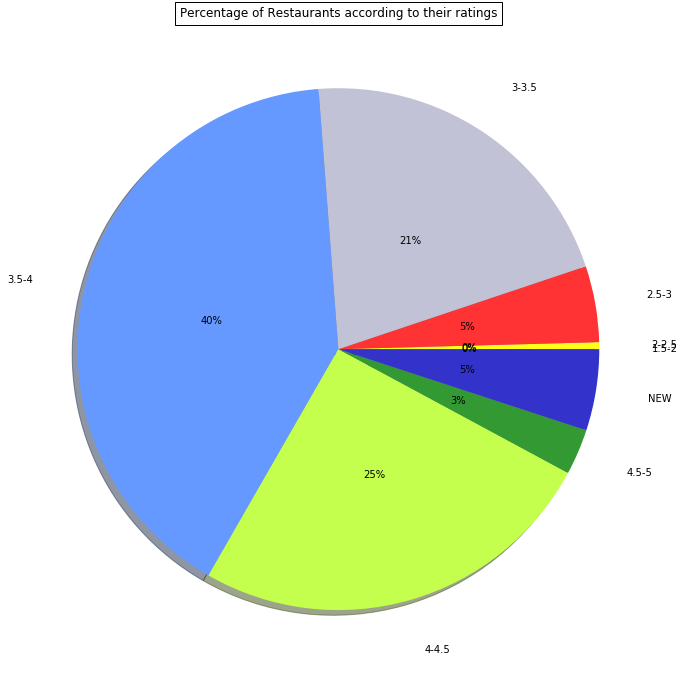

In [19]:
slices=[
((df.rate>='1.5') & (df.rate<'2')).sum(),
((df.rate>='2') & (df.rate<'2.5')).sum(),
((df.rate>='2.5') & (df.rate<'3')).sum(),
((df.rate>='3') & (df.rate<'3.5')).sum(),
((df.rate>='3.5') & (df.rate<'4')).sum(),
((df.rate>='4') & (df.rate<'4.5')).sum(),
((df.rate>='4.5') & (df.rate<'5')).sum(),
(df.rate=='NEW').sum()]
labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5','NEW']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

# Question 4
**Analyse the number of Restaurants based on their Location using Horizontal Count Plot.**

In [20]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [21]:
locationCount=df['location'].value_counts().sort_values(ascending=True)
locationCount

Peenya                      1
Rajarajeshwari Nagar        2
Jakkur                      3
Yelahanka                   6
West Bangalore              6
Central Bangalore           8
Kengeri                     9
Nagarbhavi                  9
North Bangalore            14
Hebbal                     14
Uttarahalli                17
KR Puram                   18
Kanakapura Road            19
Old Madras Road            22
Mysore Road                22
Sankey Road                27
Langford Town              27
Rammurthy Nagar            32
Magadi Road                34
Jalahalli                  38
East Bangalore             44
Koramangala                48
Sahakara Nagar             53
Sadashiv Nagar             63
Sanjay Nagar               76
RT Nagar                   80
Vijay Nagar                80
CV Raman Nagar             90
Kaggadasapura             101
Hosur Road                102
                         ... 
Kammanahalli              648
New BEL Road              649
Brookefiel

In [22]:
#lets check max count
count_max=max(locationCount)
for x,y in locationCount.items():
    if(y==count_max):
        print(x)

BTM


In [23]:
#lets check min count
min_count=min(locationCount)
for x,y in locationCount.items():
    if(y==min_count):
        print(x)

Peenya


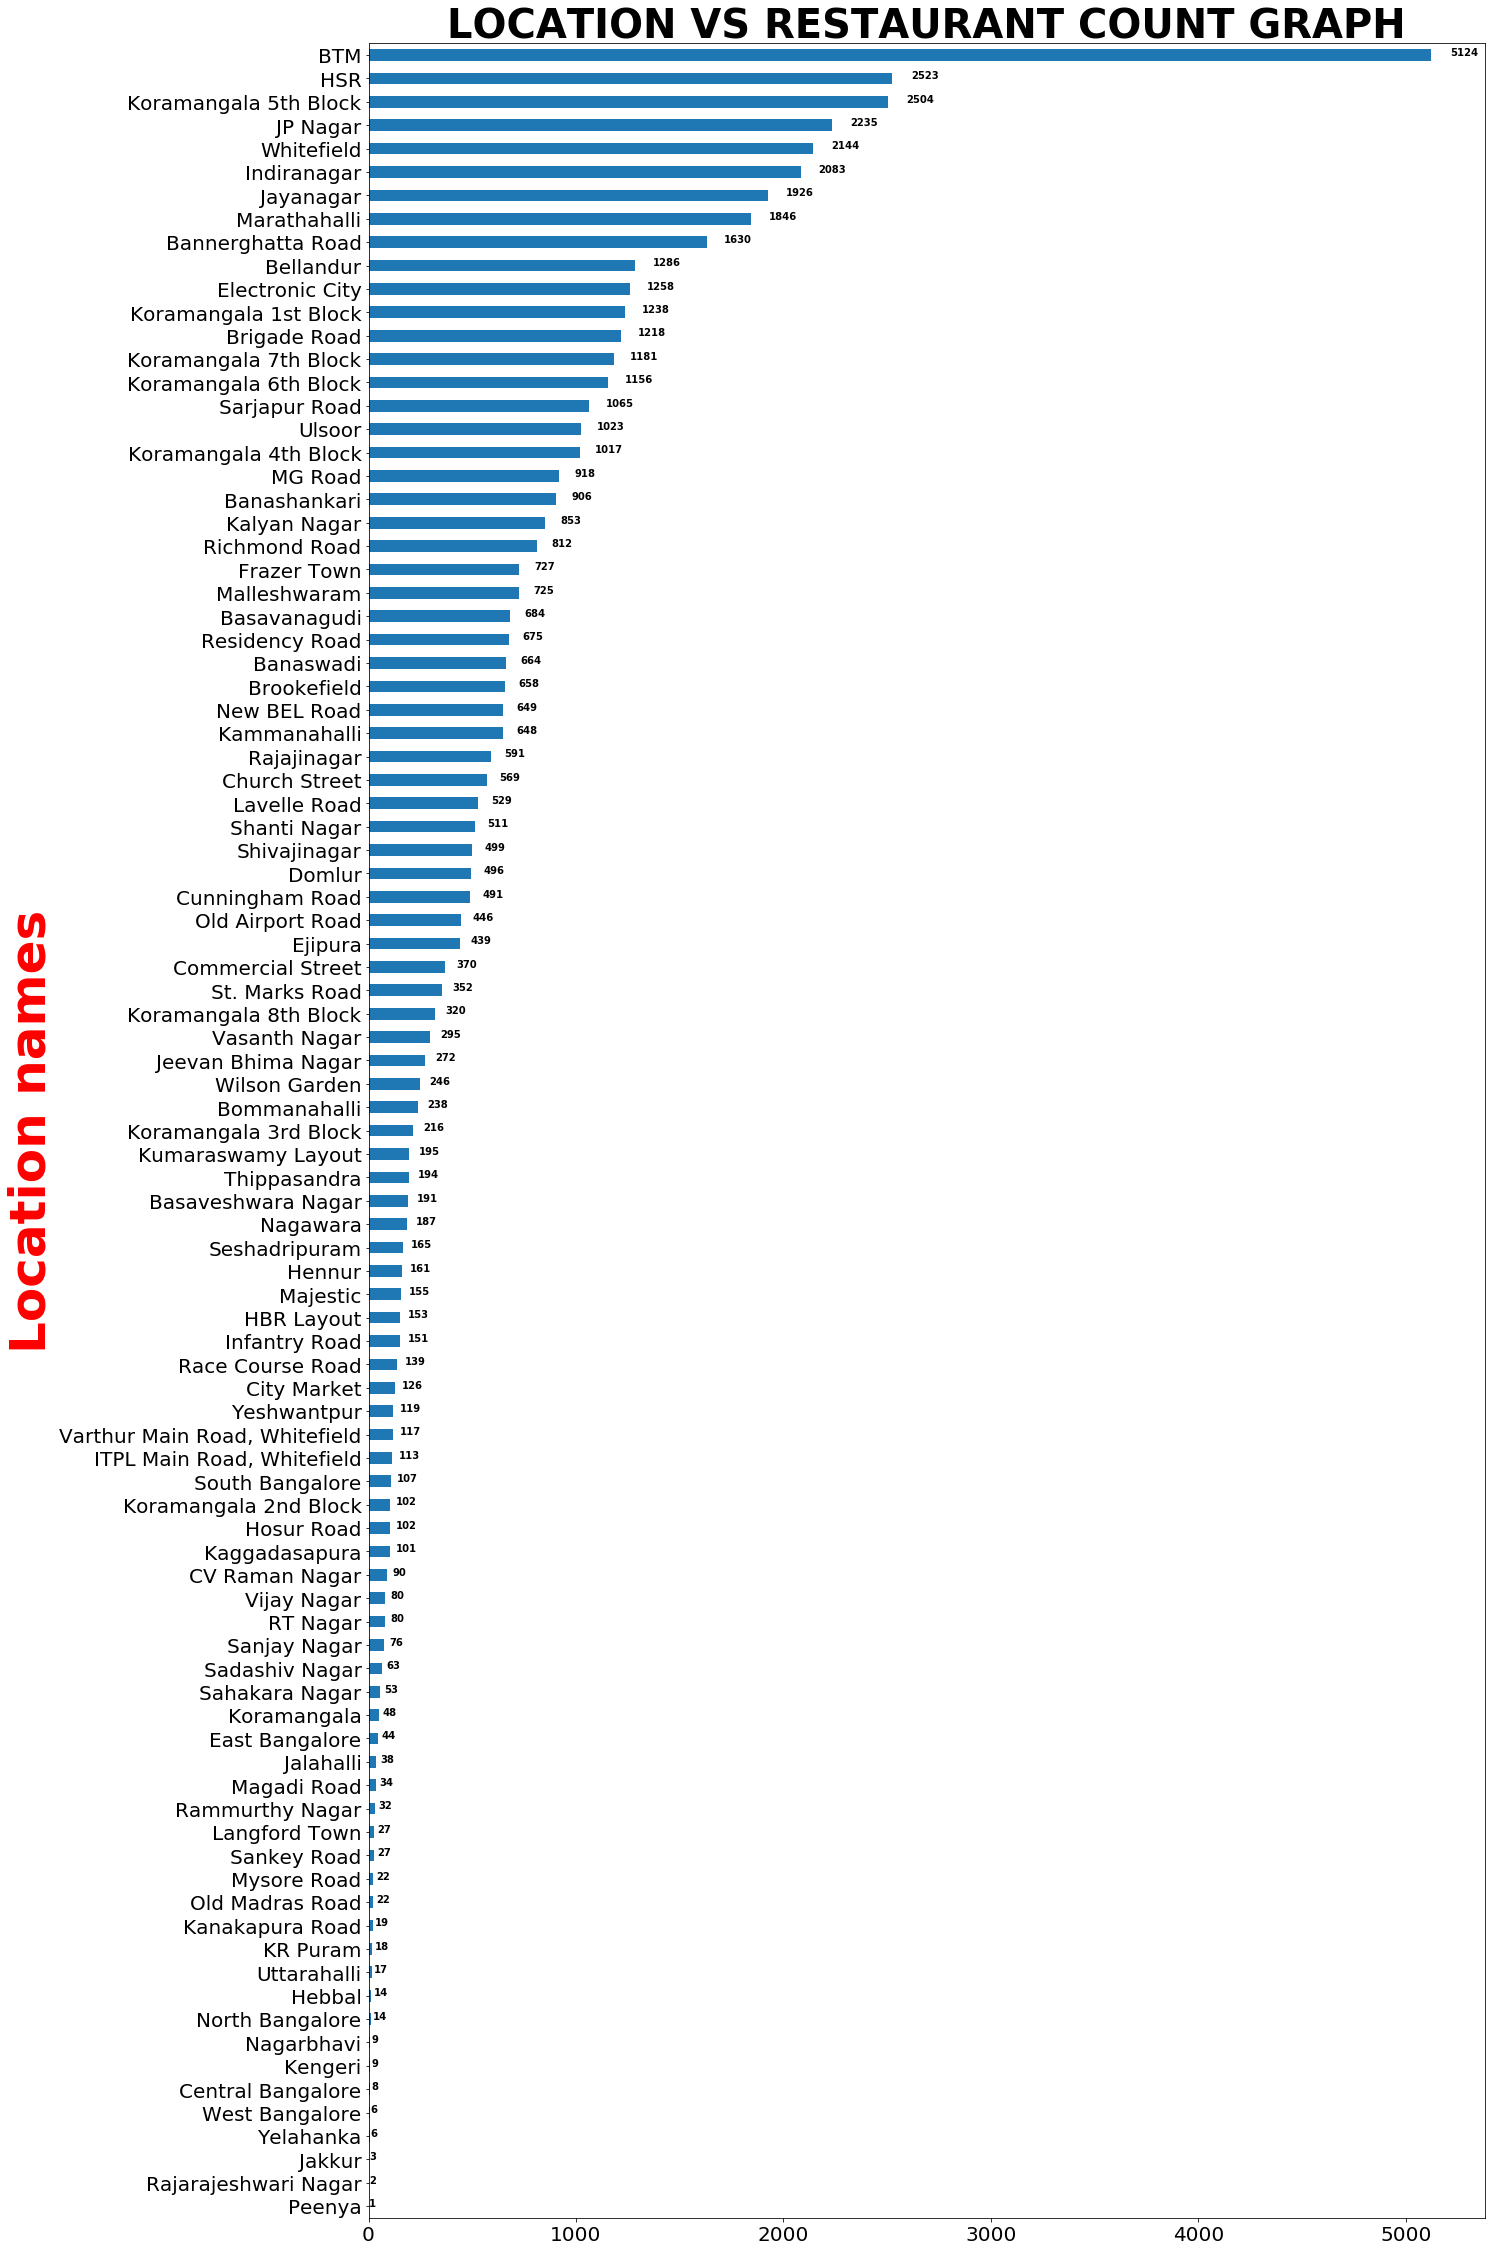

In [24]:
fig=plt.figure(figsize=(20,40))
locationCount.plot(kind="barh",fontsize=20)
plt.ylabel("Location names",fontsize=50,color="red",fontweight='bold')
plt.title("LOCATION VS RESTAURANT COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(locationCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+locationCount[v],v,locationCount[v],fontsize=10,color="BLACK",fontweight='bold')

# Question 5
**Analyse the number of Restaurants based on their Dining Type using Pie Chart**

In [25]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [26]:
restaurantTypeCount=df['listed_in(type)'].value_counts().sort_values(ascending=True)
restaurantTypeCount

Pubs and bars           697
Buffet                  882
Drinks & nightlife     1101
Cafes                  1723
Desserts               3593
Dine-out              17779
Delivery              25942
Name: listed_in(type), dtype: int64

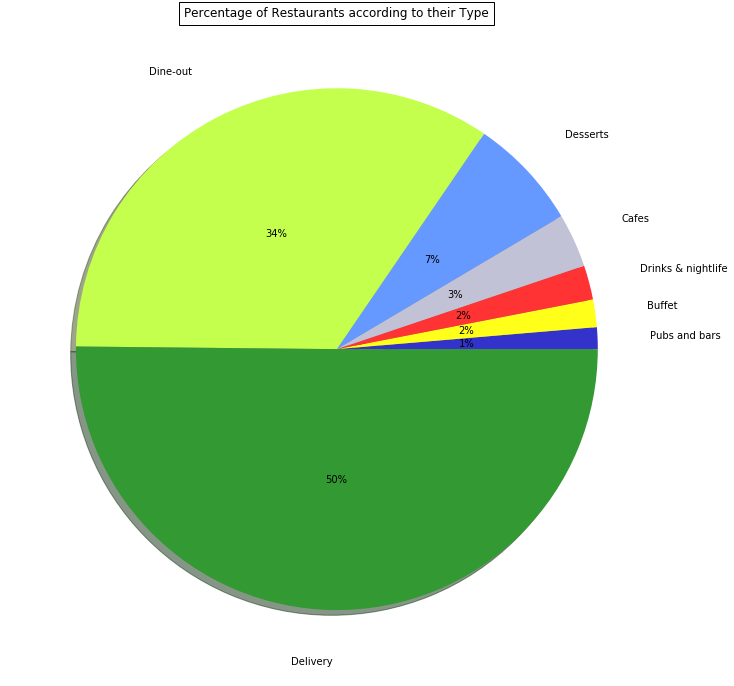

In [27]:
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

# Question 6
**Analyse the votes using line plot.** What are the limitations you see?

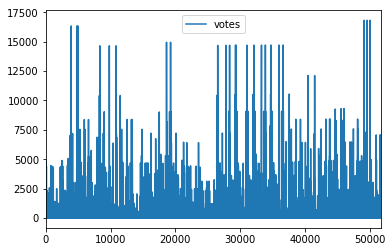

In [29]:
df.plot()

# Question 7
**Analyse the frequency of votes by drawing histogram of bins 5 (Overcoming the limitations of line plot).**

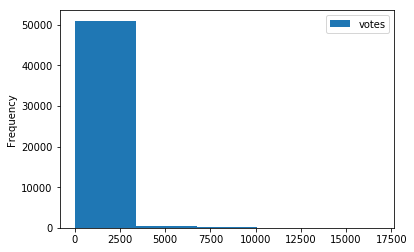

In [30]:
df.plot.hist(bins=5)

# Question 8
**Make a line chart in which all votes are summed up.**

In [31]:
df['Cumulative Frequency'] = df['votes'].cumsum()

In [32]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Cumulative Frequency
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,775
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1562
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2480
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2568
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2734


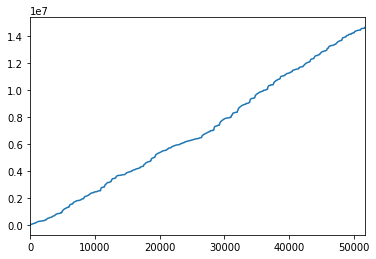

In [33]:
df['Cumulative Frequency'].plot()